# Ground State Configuration of Multiple Charged Balls - Simulation

## Overview


Multiple similarly-charged particles confined to a region will repel each other by electrostatic forces, and will seek a spatial arrangement that minimizes their total electrostatic energy. This can lead to interesting configurations that we will explore in this lab. 


The lab is divided into two portions. In the first portion, we performed experiments with multiple charged balls in a confined region, and determined the minimum-energy configurations for a number of scenarios. 
In this follow-up, we will now perform detailed simulations to compare with our measurements.


## Introduction

The potential energy between two point charges $q_1$ and $q_2$ depends on the distance between them, $r_{12}$.
If we have a collection of $N$ point charges, all charged to $+q$, then the total potential energy of the system is:

$$ U_T = \frac{q^2}{4\pi\epsilon_0} \displaystyle\sum_{i<j}^{N} \left( \frac{1}{r_{ij}} \right)$$
 
 If the $N$ point charges are confined to some specific region, then they will extert Coulomb forces on each other and seek to repel each other until they find a stable configuration that minimises the total electrostatic energy  of the system. 
 
 Consider $N$ point charges confined to the interior of a circle of radius $R$. If N is small, then the charges will seek to distribute themselves uniformly around the circumference of the circle, with none at all in the interior. 
 However, as N increases, at some point the minimum-energy configuration will shift to include 1 charge in the very center, and the remaining N-1 around the circumference. 
 Then as N increases further, the number of interior charges will grow and tend to form an inner ring of some size.
 This leads to interesting configurations as N increases, with series of inner rings forming as N becomes large enough. 
 Some publications are referenced below where several authors have studied this situation in detail. 

In the previous lab, we made a number of measurements to find (hopefully) the lowest-energy configurations.
Now we will perform simulations to study the expected behaviour. 


### Possible Effects of Induced Polarisation

When comparing to experiment, we should be aware 
that the steel balls we used in the experiment are not perfect point charges. Because they are conducting spheres, the presence of external charge will influence an asymmetric charge distribution (*polarisation*) across the surface of the sphere, attracting opposite charges and repelling like charges. 
(It is also possible that induced charge localisations on the conducting surfaces of the glass could have a further effect.)
As a result, the real steel balls probably will not behave like point charges, in regions close to the balls. 
A slightly better approximation might be to consider that they could behave like an *electric dipole*, which is what we call an arrangement of 2 equal and opposite point charges separated by some distance $d$.  
Although this goes beyond what you have probably covered in lecture, the potential at a distance $r$ from a dipole (of charge $q$ and separation $d$), is approximately given by

$$ V_{dipole}(r,\theta) \sim \frac{1}{4\pi\epsilon_0}\frac{qd \cos\theta}{r^2} $$

where $\theta$ here is the angle to the point relative to the axis of the dipole.
If we ignore the angle $\theta$, then effectively the potential due to a dipole just goes as $1/r^2$, instead of $1/r$ for a point charge. We will explore this alternative description of the potential at an appropriate point in our simulation studies. 



## Overview of Simulation Studies

In the discussion and code examples that follow, we will show how to define and plot a particular charge configuration, and how to calculate its potential energy.
Then we will start by considering just some random charge configurations within a circle, to get a feel for the potential energies. 
After that, inspired by the symmetry, we will consider cases where all N charges are distributed around the circumference, versus having N-1 around the circumference and 1 in the center; we will compute and compare the potential energy of both these configurations as a function of N. 
To try to get a better description of our experimental results, we will explore the dipole-based alternative approach to the electric potential, as described above. 
Then we will look at configurations with large N and explore the structure of the inner ring that develops. 
Finally, if time permits, we will look at cases with a square instead of circular boundary. 


## Simulation First Steps: Define and Plot a Charge Configuration; Calculate Potential Energy

In the code cells below, we will show how we will define charge configurations as a list of coordinates for each point (since each charge has the same magnitude q, we dont need to specify the charge value at each point, just its location), and how we can plot these configurations to visualise them.
Then we define a function that will calculate the potential energy of a collection of charges at specific locations

(Note that we will use units here that correspond to: electrostatic constant $k$=1, and charge $q$=1)

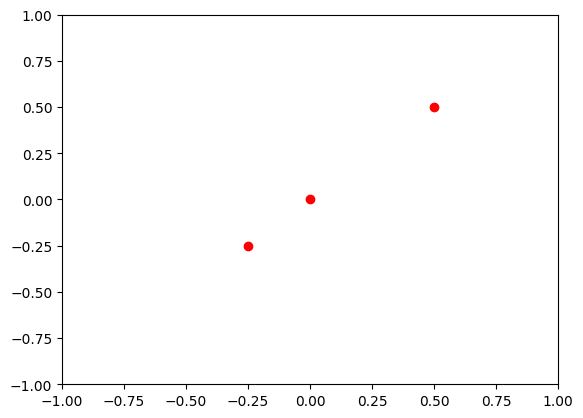

In [2]:
# define and draw a charge configuration

#define charges as list of position-coords [[x1,y1],[x2,y2], ... [xN,yN]]
# as we assume here that charge q is same at all points

# example:
test_3_charges = [[0,0],[-0.25,-0.25],[0.5,0.5]]

# How to plot a given charge confg
import matplotlib.pyplot as plt

# plot red circles at each charge location
for iq in test_3_charges:
    plt.plot(iq[0],iq[1],'ro')  #'ro' plots as red (r) circles (o)

# plot on an x,y scale of -1 to +1
plt.xlim(-1,+1)
plt.ylim(-1,+1)

plt.show()

In [3]:
# here we calc the potential energy of a defined charge arrangement

# first we will define a function specifically to calculate the distance between two given points
# then we will use that to calculate the potential energy for a given set of charge locations

import math
import numpy as np

# calc distance: args passed to func  are the two points' positions, each in the form of 2-elem list [x,y]
def calcDistanceBetweenTwoPoints(pos1,pos2):
    x1=pos1[0]
    y1=pos1[1]
    x2=pos2[0]
    y2=pos2[1]
    dist = math.sqrt((x2-x1)**2+(y2-y1)**2)
    return dist

# test this
testpos1=[1,1]
testpos2 = [0,0]
print(calcDistanceBetweenTwoPoints(testpos1,testpos2))

# now we use this distance function as part of the calculation of the total potential energy of the charge config

# calc Pot Energy for collection of charges
# for reasons we will explain later, we want to allow an additional arg rn
# that can be used to raise the distance parameter to the power of rn in the potential energy calc
# rn will default to 1.
# But we will see later why we might want to explore cases with rn=2 ....
def calcPotentialEnergy(chargeConfig, rn=1):
    Utot = 0
    # here we consider all charge pairs i & j, without double-counting
    for i in range(len(chargeConfig)):
        # now for second particle, start at i and go to end
        for j in range(i+1,len(chargeConfig)):
            #print(i,j)
            #print(chargeConfig[i],chargeConfig[j])
            dist_ij= calcDistanceBetweenTwoPoints(chargeConfig[i],chargeConfig[j])
            #print(dist_ij)
            #for each pair, there is contribn to total energy q^2/R_ij
            # Also, for reasons we will explain later, 
            # we will allow the distance value to be raised to the power of input arg rn
            # but rn defaults to 1, unless you actively change it when calling the function
            Utot = Utot + 1.0/(dist_ij**rn)
    return Utot

# test this
U1 = calcPotentialEnergy(test_3_charges)
print(U1)



1.4142135623730951
5.185449728701348


## Testing Potential Energy of Random Charge Configurations

To get started, let's suppose that the charges were just randomly distributed within the confinement region. 
We can choose a specific N, say N=10, and we consider them confined to a circle of radius R=1.
Then we can generate lots of different random charge configurations and calculate the potential energy for each one. 
This will give us an idea of the possible range of potential energy values.
Of course, the preferred charge arrangement will be the one which *minimizes* this total potential energy. 

As we are sampling many different random charge configurations, we can also keep track of the one which turns out to have the lowest potential energy, and then we can draw it specifically at the end, to see what we found.

The code below shows an example of how to do this.

What you should see when you run the code below for N=10 charges is that the mean of the potential energy distribution from these random configurations is around 105, and
the minimum potential energy probably has a value around 51-53. 
However, the lowest-energy random configuration will probably not look much like the nicely-arranged configurations that we saw in our experiments. 
This is because random sampling is an extremely inefficient way to find the minimum of a multi-variable function, so we are very unlikely to come across the optimal configuration just randomly. 
So our next step will be to consider more specific configurations, inspired by symmetry. 

[[-0.8645208454147822, 0.274278764112052], [-0.20471961346710318, -0.5134610205758634], [-0.4307370099920537, -0.8272395369015463], [0.14680638693898762, 0.09937239152308279], [-0.21747250587240727, 0.6508645907010874], [-0.04395031312570522, -0.11429016501678499], [-0.8717893554224475, 0.14220164416926534], [0.0940389880067047, -0.09010246013378274], [-0.16168148377616232, -0.7842487118111278], [0.5773990615412163, -0.23121766571527302]]


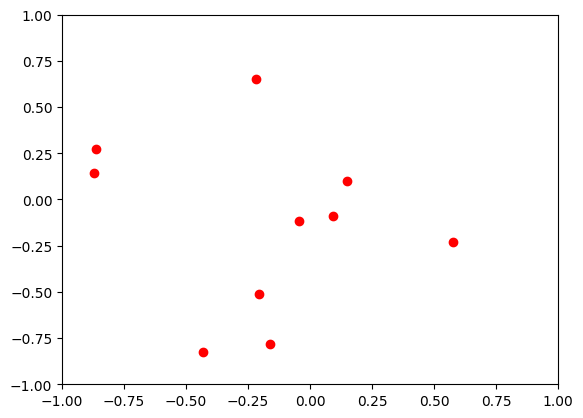

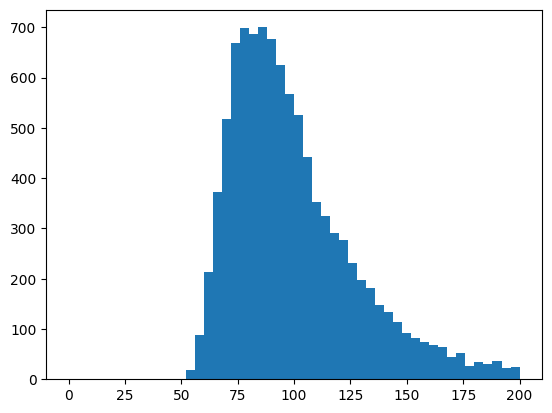

Mean pot energy =  104.52125522624594
Best (minimum) U from random samples = 51.303550082636775
Corresponding config is:


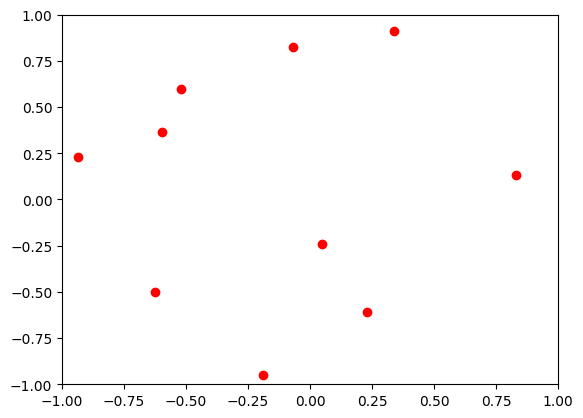

In [4]:
import random
import numpy as np

# we define the following function that will locate N charge randomly inside a circle radius R(default=1)
def distributeNRandomlyInCircle(N,R=1):
    points=[]
    for i in range(N):
        # we will randomly select and angle and radius for this i point
        ri= random.uniform(0,R)
        itheta = random.uniform(0,2*math.pi)
        # then calc and save [x,y] corresponding to this (r,theta)
        xi=ri*math.cos(itheta)
        yi=ri*math.sin(itheta)
        points.append([xi,yi])
    return points

# test this - print the results
test1 = distributeNRandomlyInCircle(10)
print(test1)
# and draw them, as in our sample code earlier
# plot red circles at each charge location
for iq in test1:
    plt.plot(iq[0],iq[1],'ro')  #'ro' plots as red (r) circles (o)
# plot on an x,y scale of -1 to +1
plt.xlim(-1,+1)
plt.ylim(-1,+1)
plt.show()
# Now check yourself that this plot looks like a random distribution within the circle
# notice that if you re-run the cell again, you should get a different random distirbution each time

# now lets use the power of our computer to generate lots of random configurations like this, 
# and calculate the potential energy of each one

# we will do 10000 random configs (for N=10 say) and get U for each
# and actually we can keep track of which of these random configs turned out to be best (ie min Energy)!
best_config=[] # we will update this as we check each random one
bestU = 1e6 # start at very high number, then keep current-lowest as we proceed to sample
N_test=10
U_random = []
for i in range(10000):
    ipoints = distributeNRandomlyInCircle(N_test)
    Ui = calcPotentialEnergy(ipoints)
    U_random.append(Ui)
    # now check if this config has lower U than best config so far
    if(Ui<bestU):
        # then its better, so update best-so-far to this one
        bestU=Ui
        best_config = ipoints

#print(U_random)

# a good way to visualise this is to histogram the range of potential energy values U that are obtained
# from all these random configurations:
plt.hist(U_random,50,(0,200))  # this does 50 histogram bins from 0 to 200
plt.show()

# and lets draw the best config of all these random ones
print("Mean pot energy = ",np.mean(U_random))
print("Best (minimum) U from random samples =",bestU)
print("Corresponding config is:")
for iq in best_config:
    plt.plot(iq[0],iq[1],'ro')  #'ro' plots as red (r) circles (o)
# plot on an x,y scale of -1 to +1
plt.xlim(-1,+1)
plt.ylim(-1,+1)
plt.show()





## Studying Circular Configurations

Now we will study specifically circular configurations, and possibly have one point in the center. 
Let's start with N=5. 
We will consider first the configuration where all 5 points are distributed equally around the circumference of the circle, and then the configuration where 1 is in the center and the remaining 4 are around the circumference.
Which of these two options turns out to have the lower potential energy?

The code below shows how to do this.

[[1.0, 0.0], [-1.0, 1.2246467991473532e-16]]
[[1.0, 0.0], [-0.4999999999999998, 0.8660254037844387], [-0.5000000000000004, -0.8660254037844385]]
[[1.0, 0.0], [6.123233995736766e-17, 1.0], [-1.0, 1.2246467991473532e-16], [-1.8369701987210297e-16, -1.0]]
[[1.0, 0.0], [6.123233995736766e-17, 1.0], [-1.0, 1.2246467991473532e-16], [-1.8369701987210297e-16, -1.0], [0, 0]]


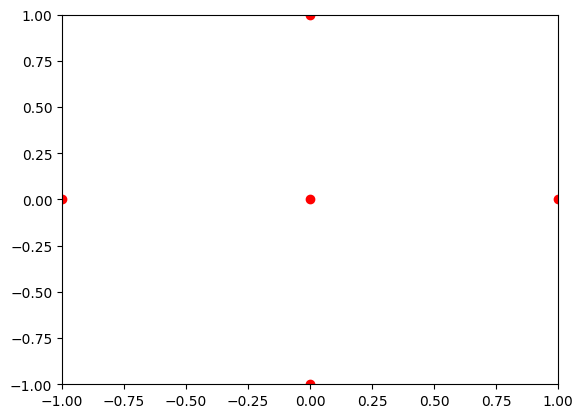

U5: 5-circ =  6.881909602355868
U5: 4-circ, 1 ctr =  7.82842712474619


In [5]:
# it is convenient for us to define a function to space N points  equally around a circle
# with an option to choose radius of circle (defaults to 1), and offset for first point if desired (default 0)

def distributeNAroundCircle(N,R=1,offset=0):
    points=[]  
    interval = 2*math.pi/N
    for i in range(N):
        thetai = offset+ (i*interval)
        xi = R*math.cos(thetai)
        yi = R*math.sin(thetai)
        points.append([xi,yi])  
    return points

# test this:
print(distributeNAroundCircle(2))
print(distributeNAroundCircle(3))
print(distributeNAroundCircle(4))

# consider 5 charges, all equally around circumference
charges_5_circ = distributeNAroundCircle(5)

# now we will consider 5 charges, but 4 around cicrumference and 1 in center. 
#We can conveniently build this as follow
charges_4_circ =  distributeNAroundCircle(4)
center = [0,0]
charges_5_ctr = charges_4_circ
charges_5_ctr.append(center)

print(charges_5_ctr)
# draw it to visualise
for iq in charges_5_ctr:
    plt.plot(iq[0],iq[1],'ro')  #'ro' plots as red (r) circles (o)
plt.xlim(-1,+1)
plt.ylim(-1,+1)
plt.show()

# now compare potential energy of these two configs
U5a = calcPotentialEnergy(charges_5_circ)
U5b = calcPotentialEnergy(charges_5_ctr)
print("U5: 5-circ = ",U5a)
print("U5: 4-circ, 1 ctr = ",U5b)



## Activity: Explore Circular/Central Arrangements for Different N

Using the code above as an example, you should now explore values of N from N=5 to N=13
For each N, consider the two cases where (a) all N points are arranged equally around the circumference of the circle; (b) N-1 are arranged equally around the circumference, and 1 point is in the center

Find the potential energy of these two configurations for each N, and compare them. 
(As a cross-check, you should find that the configuration with lowest potential energy for N=10 has U=38.62
and that for N=11, the lowest energy configuration has U=48.57)

For small values of N, you should find that the arrangement with all N around the circumference has the lower energy, but this will change at a certain point. 
At what value of N do you find that the lowest-energy configuration corresponds to having 1 point in the center and N-1 around the circumference?

How does this N value compare to what you found from your previous experimental measurements?

<br>
<span style="color:red;font-weight:bold;">
After you have completed this activity, it's a good idea check in with the instructor/TA before proceeding. 
</span>

In [6]:
# your code to explore different N should go here
# re-use the above defined functions as much as possible!

## Next Level Simulation: Dipole-Based Approach to Potential

You should have found from your above study that the value of N where it is preferred that one charge goes into the center is N=12. 
But in our experiments, we found that this happened in practice for smaller N values than that. 
So perhaps the difference is due to the effect described in the Introduction, where the steel balls are not really point charges, and as a result of induced charge distributions on the surface, the point-charge case is not accurate in the region close to the steel balls. 

In that case, we may be able to get a better simulation by approximating the steel balls as a collection of dipoles. 
We will ignore possible dipole orientations for now, and just focus on the change in the distance-dependence of the potential, from $1/r$ for a point charge to $1/r^2$ for a dipole. 
We can simulate this effect using the distance parameter **rn** that we built into our original potential  -- we get the dipole case when we evaluate it with rn=2

Let's try this below for the case N=10. In this approach, which configuration has the lower energy when N=10?

In [7]:
# now we explore the dipole approximation for the potential instead
# we will do this for N=10

charges_10_circ = distributeNAroundCircle(10)
# now do 1 in ctr, 9 around circ
charges_10_ctr = distributeNAroundCircle(9) # do 9 around circ first
charges_10_ctr.append([0,0]) # then add center specifically

rn_dipole=2
U10_circ = calcPotentialEnergy(charges_10_circ,rn_dipole)
U10_ctr = calcPotentialEnergy(charges_10_ctr,rn_dipole)
print("With dipole approx, U 10 circ = ",U10_circ)
print("and U 10  as (9,1) = ",U10_ctr)


With dipole approx, U 10 circ =  41.25000000000001
and U 10  as (9,1) =  39.0


## Activity: Explore Dipole Approach for different N

Using the code above as an example, you should now explore values of N from N=5 to N=13, *using the dipole approach for the potential energy calculation*. 
For each N, consider the two cases where (a) all N points are arranged equally around the circumference of the circle; (b) N-1 are arranged equally around the circumference, and 1 point is in the center

Find the potential energy of these two configurations for each N, and compare them. 
(As a cross-check, you should find that the configuration with lowest potential energy for N=12 has U=66)

Still for small values of N, you should find that the arrangement with all N around the circumference has the lower energy, but this will change at a certain point. 
Now using the dipole approach, at what value of N do you find that the lowest-energy configuration corresponds to having 1 point in the center and N-1 around the circumference?

Does this N value get closer than the point-charge case to what you found from your previous experimental measurements? 
Does it agree completely?

<br>
<span style="color:red;font-weight:bold;">
After you have completed this activity, it's a good idea check in with the instructor/TA before proceeding. 
</span>

In [8]:
# your code should  go in here 
# as always, try to re-use already-defined functions as much as possible

## Toward an Even More Realistic Simulation

You should find that this dipole-based approach predicts that the two alternative configurations have equal energy now for N=8. However, our experimental measurements had an even lower value than this.  

Presumably, we could get an even more accurate simulation if we considered the *orientation* of the dipoles. Our simulation above essentially ignored the orientation, but in reality we would expect the dipole orientations to interact with each other and prefer a lower-energy configuration when they align with each other in a particular way. 
In principle this could be done also in simulation, but we will not go into those complications here. 


## Extra Credit: Configurations with Large N: Structure of Inner Ring

As the number of charges N increases, we probably saw in our experiments that eventually there will not just be 1 charge in the center, but rather there will form an inner ring of multiple charges. 
In this case, there will be two parameters to consider: the number of charges $n_1$ in the inner ring, relative to the total $N$; and the radius $r_1$ of the inner ring relative to the outer ring $R=1$.

For **extra credit**, you could attempt to find the combination of $n_1$ and $r_1$ that gives the lowest energy configuration for larger N.

In the case of N=20, for example, it is found that the inner ring should have $n_1$=3 charges, while an inner ring number of $n_1=4$ is preferred for N=22-24, rising to $n_1=5$ for N=25-29.
Reference 3 (Kurmela paper) below shows the results obtained for $n_1$ from their calculation of the optimal configuration for a large range of N. 
Ref 2b includes the values of the inner ring radius $r_1$ for some cases of $N$.
At least for the point-charge case, you should be able to reproduce these results. 

You could also try using the dipole-based approach, and see if your predicted inner ring radii are similar to what was seen experimentally for large N.

## Configurations with a Square Boundary

If time permits, the student should try to simulate the case where the fixed outer boundary is a square, rather than a circle. 
It is expected that for small N, the lowest energy configuration should still correspond to all N being on the boundary. But it would be interesting to see the predictions for the inner structure as N increases. 

## Assignment

The Assignment is a lab report summarizing both portions of this lab. 
You should describe the experimental apparatus used to make the measurements, and show the results you obtained.
Then compare these results with the output from your simulation studies today, and discuss what has  been learned (eg, the importance of the fact that the steel balls are not point charges, when it comes to the details of the lowest-energy configurations)




## References


   * A. A. Berezin, Nature 315 104 (1985): https://www.nature.com/articles/317208c0
   
   *  L T Wille and J Vennik 1985 J. Phys. A: Math. Gen. 18 L1113:
   https://iopscience.iop.org/article/10.1088/0305-4470/18/17/009
   ; L T Wille and J Vennik 1986 J. Phys. A: Math. Gen. 19 1983: 
   https://iopscience.iop.org/article/10.1088/0305-4470/19/10/540
   * Kari J Nurmela 1998 J. Phys. A: Math. Gen. 31 1035: https://iopscience.iop.org/article/10.1088/0305-4470/31/3/014
   